In [1]:
from bsread import source, SUB, PULL, PUSH, PUB
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import seaborn as sns
from scipy.stats import norm
from cam_server.utils import get_host_port_from_stream_address

In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [30]:
# Channel check
#from cam_server.utils import get_host_port_from_stream_address

port=9003
host = "sf-daqsync-03.psi.ch"
mode = SUB
num_shots = 1

with source(host=host, port=port, mode=mode) as stream:
    for i in range(0,num_shots):
        message = stream.receive()
        if i == 0:
            print(message.data.data.keys()) 

odict_keys(['SARES20-CAMS142-M5.processing_parameters', 'SARES20-CAMS142-M5.roi_signal_x_profile', 'SAR-CVME-TIFALL5:EvtSet'])


In [32]:
message.data.data['SARES20-CAMS142-M5.roi_signal_x_profile'].value

array([ 12140,  11977,  11883, ..., 179177, 179066, 170567])

In [43]:
message.data.data['SAR-CVME-TIFALL5:EvtSet'].value

In [44]:
channels = ['SARES20-CAMS142-M5.roi_signal_x_profile', 'SAR-CVME-TIFALL5:EvtSet']
with source(channels=channels) as stream:
    message = stream.receive()
message.data.data['SAR-CVME-TIFALL5:EvtSet'].value   

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [16]:
port=9003
host = "sf-daqsync-03.psi.ch"
mode = SUB
num_shots = 5000
x_corr = []
x_corr_amp = []
signal = []
raw_wf = []
raw_wf_savgol = []
dark_wf = []
avg_dark_wf = []
att = []
edge_pos = []
pulse_id = []
at_odd = []
at_even = []

with source(host=host, port=port, mode=mode) as stream:
    for i in range(0,num_shots):
        message = stream.receive()
        if i == 0:
            print(message.data.data.keys())
        try:
            x_corr.append(message.data.data['SAROP21-ATT01:xcorr'].value)
            x_corr_amp.append(message.data.data['SAROP21-ATT01:xcorr_ampl'].value) 
            signal.append(message.data.data['SAROP21-ATT01:signal'].value)
            att.append(message.data.data['SAROP21-ATT01:arrival_time'].value)
            edge_pos.append(message.data.data['SAROP21-ATT01:edge_pos'].value)
            raw_wf.append(message.data.data['SAROP21-ATT01:raw_wf'].value)
            raw_wf_savgol.append(message.data.data['SAROP21-ATT01:raw_wf_savgol'].value)
            avg_dark_wf.append(message.data.data['SAROP21-ATT01:avg_dark_wf'].value)
            pulse_id.append(message.data.data['SAROP21-ATT01:pulse_id'].value)
            at_odd.append(message.data.data['SAROP21-ATT01:arrival_time_odd'].value)
            at_even.append(message.data.data['SAROP21-ATT01:arrival_time_even'].value)
        except:
            continue
        
        
x_corr = np.asarray(x_corr)        ]

SyntaxError: invalid syntax (<ipython-input-16-9f5aff390335>, line 39)

In [3]:
#from cam_server.utils import get_host_port_from_stream_address

port=9003
host = "sf-daqsync-03.psi.ch"
mode = SUB
num_shots = 5000
x_corr = []
x_corr_amp = []
signal = []
raw_wf = []
raw_wf_savgol = []
dark_wf = []
avg_dark_wf = []
att = []
edge_pos = []
pulse_id = []
at_odd = []
at_even = []

with source(host=host, port=port, mode=mode) as stream:
    for i in range(0,num_shots):
        message = stream.receive()
        if i == 0:
            print(message.data.data.keys())
        try:
            x_corr.append(message.data.data['SAROP21-ATT01:xcorr'].value)
            x_corr_amp.append(message.data.data['SAROP21-ATT01:xcorr_ampl'].value) 
            signal.append(message.data.data['SAROP21-ATT01:signal'].value)
            att.append(message.data.data['SAROP21-ATT01:arrival_time'].value)
            edge_pos.append(message.data.data['SAROP21-ATT01:edge_pos'].value)
            raw_wf.append(message.data.data['SAROP21-ATT01:raw_wf'].value)
            raw_wf_savgol.append(message.data.data['SAROP21-ATT01:raw_wf_savgol'].value)
            avg_dark_wf.append(message.data.data['SAROP21-ATT01:avg_dark_wf'].value)
            pulse_id.append(message.data.data['SAROP21-ATT01:pulse_id'].value)
            at_odd.append(message.data.data['SAROP21-ATT01:arrival_time_odd'].value)
            at_even.append(message.data.data['SAROP21-ATT01:arrival_time_even'].value)
        except:
            continue
        
        
x_corr = np.asarray(x_corr)        

odict_keys(['SARES20-CAMS142-M5.roi_signal_x_profile', 'SAR-CVME-TIFALL5:EvtSet'])


KeyboardInterrupt: 

In [228]:
edge_pos = np.asarray(edge_pos)
att = np.asarray(att)
signal = np.asarray(signal)
index_good = signal.sum(axis=1)>1

1035.0


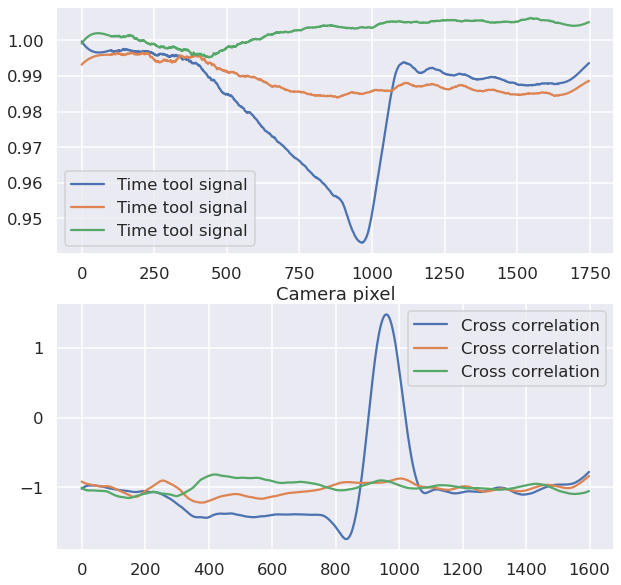

In [229]:
ind = 7
sns.set_context('talk')
plt.figure(figsize=[10,10])
plt.subplot(211)
plt.plot(signal[ind], label= "Time tool signal")
plt.plot(signal[ind+1], label= "Time tool signal")
plt.plot(signal[ind+3], label= "Time tool signal")


plt.legend()
plt.xlabel('Camera pixel')
plt.subplot(212)
plt.plot(x_corr[ind], label= "Cross correlation")
plt.plot(x_corr[ind+1], label= "Cross correlation")
plt.plot(x_corr[ind+3], label= "Cross correlation")
plt.legend()
plt.savefig('ATT_pp_edge_example')
print(edge_pos[ind])

Text(0.5, 1.0, 'SAROP21-ATT01 FWHM 20.92')

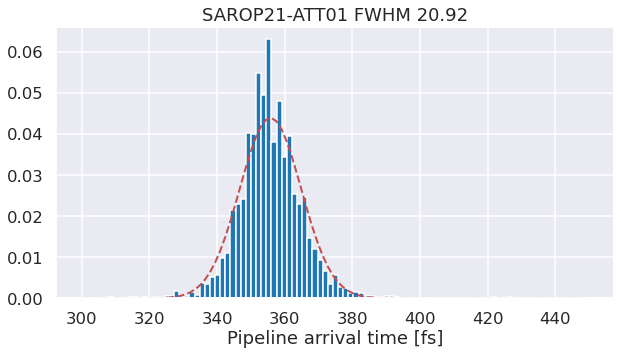

In [236]:
plt.figure(figsize=[10,5])

data = att[index_good]
data = data[data>300]
data = data[data<450]

(mu, sigma) = norm.fit(data)
# n, bins, patches = plt.hist(data, density=True, color = 'tab:blue',label='SPECT_RES')
n, bins, patches = plt.hist(data, density=True,bins=np.linspace(300,450,100), color = 'tab:blue',label='SPECT_RES')

y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

# plt.hist(edge_pos, np.linspace(1000,1150,100))
#plt.hist(edge_pos[index_good],np.linspace(800,1200,100))
# sns.distplot(att[index_good][att_good])
plt.xlabel('Pipeline arrival time [fs]')
FWHM = sigma*2.3
plt.title('SAROP21-ATT01 FWHM %.2f'%FWHM)

In [25]:
plt.figure()
plt.subplot(211)
plt.hist(at_odd, np.linspace(820,900,30),label = 'odd')
plt.legend()            
plt.subplot(212)
plt.hist(at_even, np.linspace(820,900,30), label = 'even')
plt.legend()

/sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6619: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6620: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/sf/photo/miniconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in less_equal
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Error in callback <function flush_figures at 0x7fc485301048> (for post_execute):


KeyboardInterrupt: 

In [11]:
index_even = np.asarray(pulse_id) %2 == 0

In [196]:
1/2.9

0.3448275862068966

In [139]:
np.asarray(signal)[index_even]

array([array([0.99852156, 0.99850649, 0.99849225, ..., 0.98560144, 0.98551966,
       0.98543637]),
       array([0.99915567, 0.99914202, 0.99912906, ..., 0.99088219, 0.9908038 ,
       0.99072384]),
       nan, ..., nan,
       array([0.99684336, 0.99681347, 0.99678579, ..., 0.98195292, 0.98203408,
       0.98211716]),
       array([0.99803013, 0.99793441, 0.99784181, ..., 0.98354842, 0.98355933,
       0.98357057])], dtype=object)

In [12]:
signal_good_even= []
for val in np.asarray(signal)[index_even]:
    if ~np.isnan(np.sum(val)):
        signal_good_even.append(val)
signal_good_even = np.asarray(signal_good_even)

signal_good_odd= []
for val in np.asarray(signal)[~index_even]:
    if ~np.isnan(np.sum(val)):
        signal_good_odd.append(val)
signal_good_odd = np.asarray(signal_good_odd)

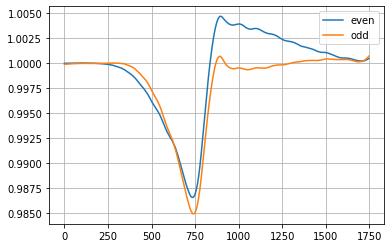

In [26]:
plt.figure()
plt.plot(signal_good_even.mean(axis=0), label= 'even')
plt.plot(signal_good_odd.mean(axis=0), label= 'odd')
plt.grid(True)
plt.legend()

In [14]:
for val in signal_test:
    if np.isnan(val.all()):
        print(val)

NameError: name 'signal_test' is not defined

In [16]:
for val in signal:
    print(val[0])

1.000345176197205
0.999807603399316
1.0000050092388215
1.0004354481955762


IndexError: invalid index to scalar variable.

In [103]:
index_data = signal  != 'nan'

In [104]:
index_data

True

In [137]:
signal_test = np.asarray(signal)

In [138]:
signal_test[index_even].shape

(5002,)

In [70]:
signal[index_even]

TypeError: only integer scalar arrays can be converted to a scalar index

In [67]:
signal_even = signal[index_even]

TypeError: only integer scalar arrays can be converted to a scalar index

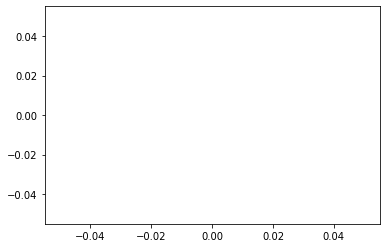

In [56]:
plt.figure()
plt.plot(np.asarray(signal).mean(axis=0))

In [ ]:
plt.figure()
plt.plot(np.asarray(raw_wf).mean(axis=0))

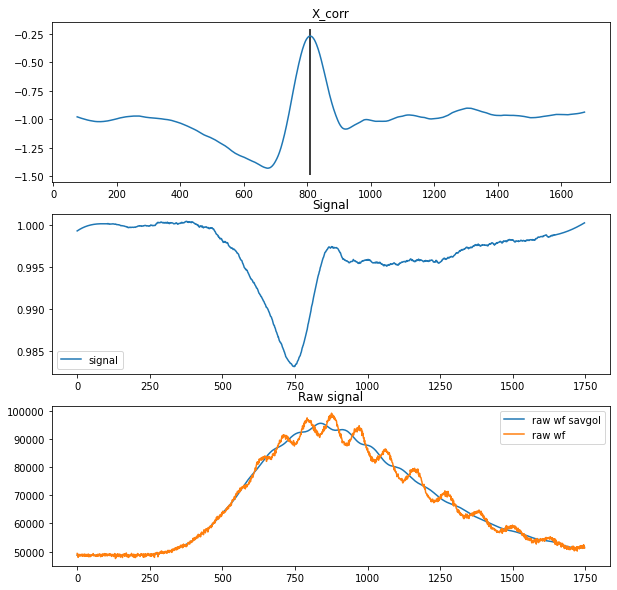

In [19]:
lags = np.arange(75,len(x_corr[0])+75)
ind = 20
plt.figure(figsize=[10,10])
plt.subplot(311)
plt.title('X_corr')
plt.plot(lags,x_corr[ind])
lims = plt.gca().get_ylim()
plt.vlines(edge_pos[ind], lims[0],lims[1])
plt.subplot(312)
plt.title('Signal')
plt.plot(signal[ind], label ='signal')
#plt.plot(avg_dark_wf[ind], label = 'avg_dark_wf')
plt.legend()
plt.subplot(313)
plt.title('Raw signal')
plt.plot(raw_wf_savgol[ind], label = 'raw wf savgol')
plt.plot(raw_wf[ind], label = 'raw wf')
plt.legend()

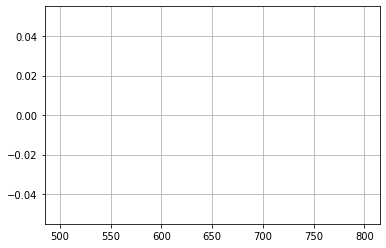

In [27]:
plt.figure()
plt.hist(edge_pos, bins = np.linspace(500, 800,100))
plt.grid()

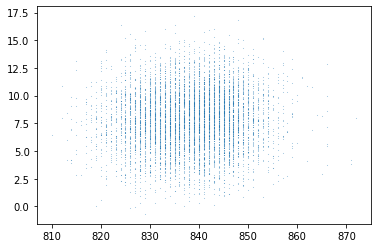

In [65]:
plt.figure()
plt.plot(edge_pos, x_corr_amp,'*', ms = 0.1)